# Run workflow with c3s-ipcc-atlas data

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki
from rooki import operators as ops

## subset operator: atlas cmip5

In [2]:
resp = rooki.subset(
    collection='c3s-ipcc-atlas.tnn.CMIP5.rcp45.mon',
    #time='2010/2010',
    # use original_files flag to skip subsetting operation ... only filter in catalog.
    #original_files=1,
)
resp.ok

True

In [3]:
resp.download_urls()

['https://data.mips.copernicus-climate.eu/thredds/fileServer/esg_c3s-ipcc-atlas/CMIP5/rcp45/tnn_CMIP5_rcp45_mon_200601-210012.nc']

## subset operator: atlas cmip6

In [4]:
resp = rooki.subset(
    collection='c3s-ipcc-atlas.tnn.CMIP6.historical.mon',
    #time='2000/2000',
    #original_files=1,
)
resp.ok

True

In [5]:
resp.download_urls()

['https://data.mips.copernicus-climate.eu/thredds/fileServer/esg_c3s-ipcc-atlas/CMIP6/historical/tnn_CMIP6_historical_mon_185001-201412.nc']

## subset operator: atlas cordex 

In [6]:
resp = rooki.subset(
    collection='c3s-ipcc-atlas.tnn.CORDEX-AFR.historical.mon',
    # skip time restriction to get all files ... only per ds_id
    # time='2000/2000',
    # original files flag not necessary
    # original_files=0,
)
resp.ok

True

In [7]:
resp.download_urls()

['https://data.mips.copernicus-climate.eu/thredds/fileServer/esg_c3s-ipcc-atlas/CORDEX-AFR/historical/tnn_CORDEX-AFR_historical_mon_197001-200512.nc']

## subset operator: error when dataset not found

In [8]:
resp = rooki.subset(
    collection='c3s-ipcc-atlas.tnn.CORDEX-AFR.historical.mon',
    # skip time restriction to get all files ... only per ds_id
    time='2030/2030',
    original_files=1,
)
resp.ok

 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: Some or all of the requested collection are not in the list of available data.'}


False

## subset operator: error when running clisops subset operation (not original files)

In [9]:
resp = rooki.subset(
    collection='c3s-ipcc-atlas.tnn.CORDEX-AFR.historical.mon',
    time='2000/2000',
    original_files=0,
)
resp.ok

 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: Format not recognised: None . Must be one of: netcdf : method : to_netcdf , extension : nc , nc : method : to_netcdf , extension : nc , zarr : method : to_zarr , extension : zarr , xarray : method : None, extension : None .'}


False

## workflow: subset atlas cmip5


In [10]:
cmip6_ds = ops.Input(
    'ds', ['c3s-ipcc-atlas.tx40.CMIP5.rcp45.mon']
)

wf = ops.Subset(
    cmip6_ds, 
    # time="2010/2010",
    # original_files=1,
)


In [11]:
resp = wf.orchestrate()
resp.ok

True

In [12]:
ds = resp.datasets()[0]
ds

/usr/local/Caskroom/mambaforge/base/envs/rooki/lib/python3.11/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tx40' has multiple fill values {1.0384594e+34, -1.7014118e+38}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:          (lat: 90, bnds: 2, lon: 180, time: 1140, member: 28)
Coordinates:
  * lat              (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon              (lon) float64 -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time             (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2100-12-01
    member_id        (member) object ...
    gcm_institution  (member) object ...
    gcm_model        (member) object ...
    gcm_variant      (member) object ...
    threshold        float32 ...
    height2m         float64 ...
Dimensions without coordinates: bnds, member
Data variables:
    lat_bnds         (lat, bnds) float64 ...
    lon_bnds         (lon, bnds) float64 ...
    time_bnds        (time, bnds) datetime64[ns] ...
    tx40             (member, time, lat, lon) float32 ...
    crs              int32 ...
Attributes: (12/28)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      IPCC-WGI AR6 Interactive Atlas Dataset
    summary:                    IPCC-WGI AR6 Interactive Atlas dataset: Month...
    keywords:                   CMIP5, CMIP6, CORDEX, IPCC, Interactive Atlas
    institution:                Instituto de Fisica de Cantabria (IFCA, CSIC-...
    contact:                    ipcc-ddc@ifca.unican.es
    ...                         ...
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lon_resolution:  2.0
    geospatial_lon_units:       degrees_east
    date_created:               2022-10-26T00:00:00+00:00
    tracking_id:                d00c3949-082b-4a6a-9d7f-cda7ed8edfb7

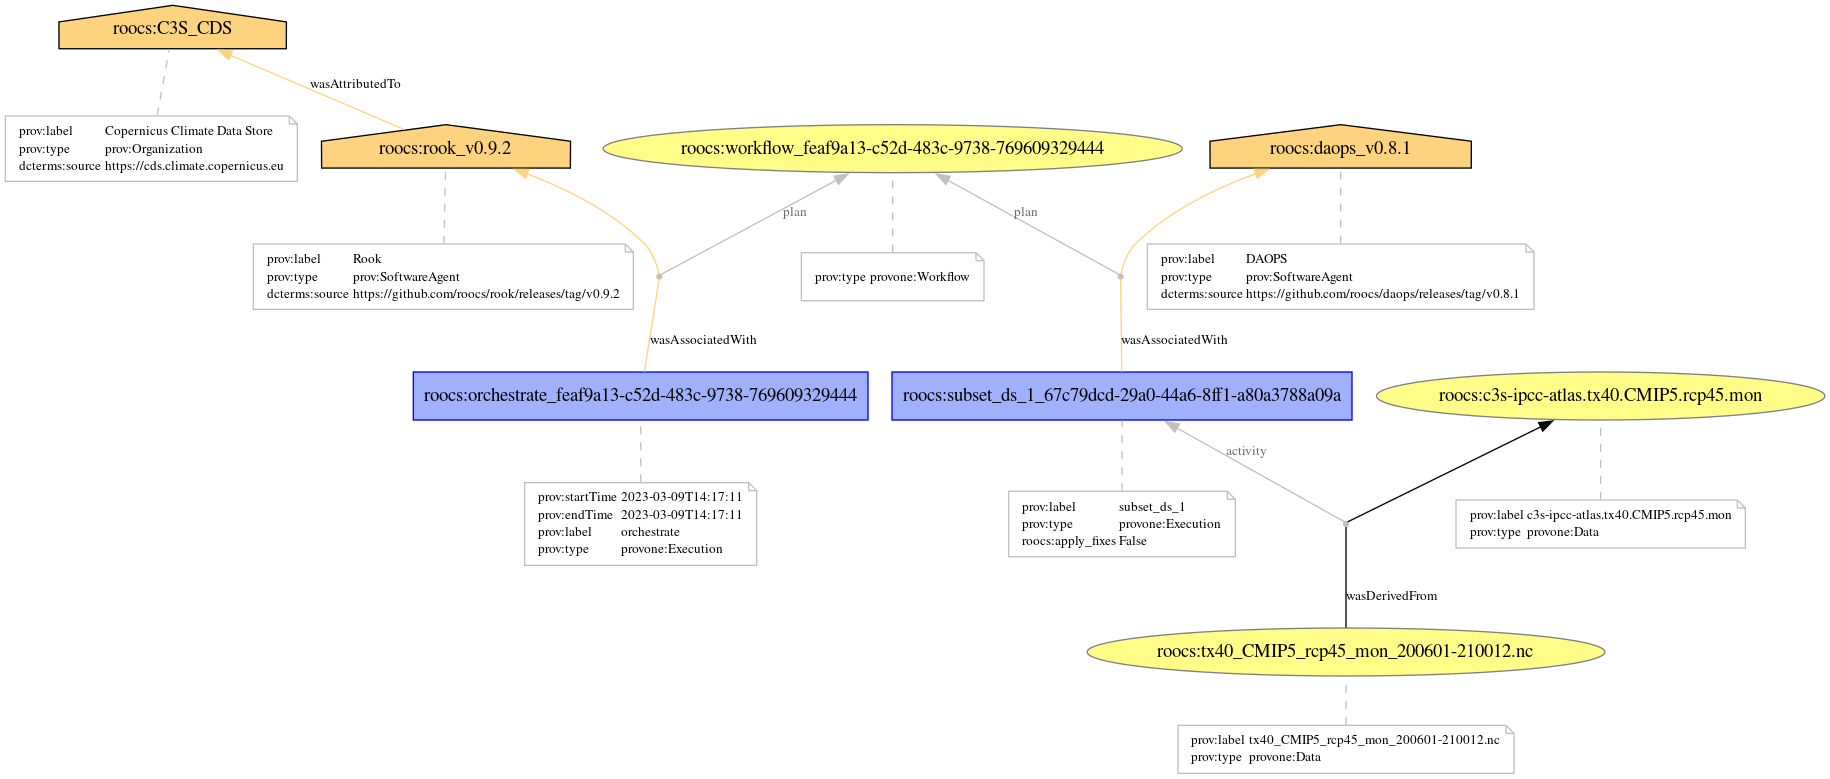

In [13]:
from IPython.display import Image
Image(resp.provenance_image())